In [4]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
import statsmodels
import matplotlib.pyplot as plt

In [5]:
PATH = "temp.csv"
dataset = pd.read_csv(PATH)
dataset['Date'] = pd.to_datetime(dataset[['year', 'month', 'day']])
dataset = dataset.drop(['year', 'month', 'day'], axis=1)
important_columns = ["Date", "chennai"]
dataset = dataset[important_columns].copy()
dataset.replace("na", np.nan, inplace=True)
dataset.dropna(inplace=True) # Удалили строки со значением Nan
dataset.reset_index(drop=True, inplace=True) # Пронумеровал id заново
dataset['chennai'] = dataset['chennai'].astype(float)
dataset.set_index('Date', inplace=True)
dataset.head(10)

,chennai
Date,
1995-01-01,72.4
1995-01-02,73.5
1995-01-03,72.6
1995-01-04,75.2
1995-01-05,74.8
1995-01-06,76.4
1995-01-07,78.4
1995-01-08,78.6
1995-01-09,78.1


In [6]:
dataset.describe()

,chennai
count,9103.000000
mean,83.417588
std,4.726096
min,69.700000
25%,79.400000
50%,83.800000
75%,87.000000
max,97.900000


In [7]:
dataset = dataset['chennai'].resample('MS').mean()
dataset = dataset.fillna(dataset.bfill())
dataset.to_csv('test.csv', index=False)
dataset.describe()

count    300.000000
mean      83.404233
std        4.264971
min       75.412903
25%       79.549194
50%       84.007581
75%       86.739946
max       92.546667
Name: chennai, dtype: float64

In [8]:
train = dataset[:250]
test = dataset[250:]

fitted_model = statsmodels.tsa.holtwinters.ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=12).fit()

In [9]:
test_predictions = fitted_model.forecast(len(test)+ 36)

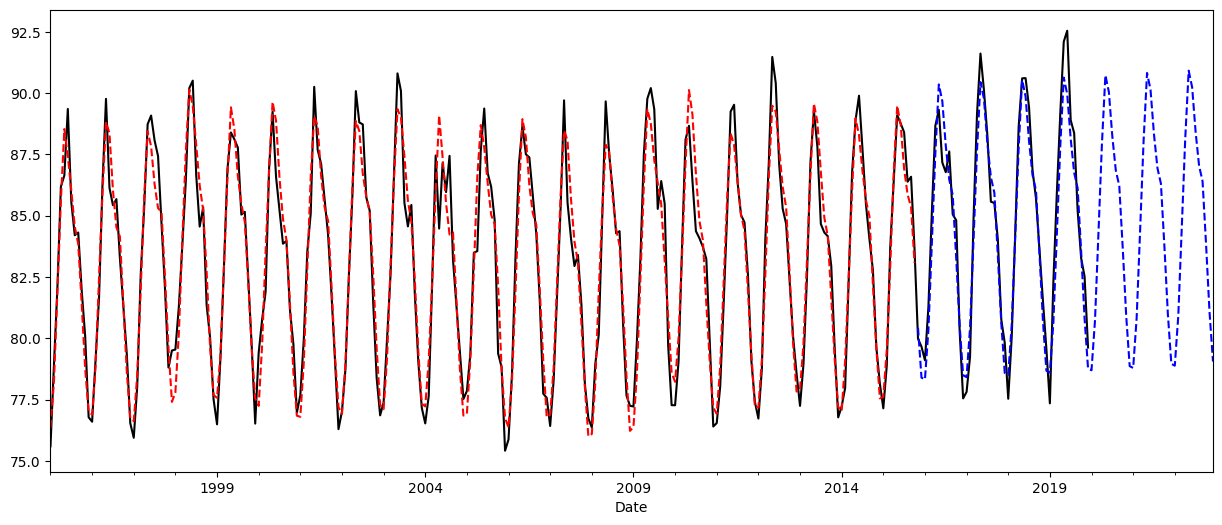

In [10]:
ax = dataset.plot(
    figsize=(15, 6),
    color='black'
)
fitted_model.fittedvalues.plot(ax=ax, color='red', style='--')
test_predictions.plot(ax=ax, color='blue', style='--')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(test, test_predictions[:len(test_predictions)-36]))

1.2169605095194533


In [12]:
print(r2_score(test, test_predictions[:len(test_predictions)-36]))

0.9346722530079733
